In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
from scipy.optimize import curve_fit

In [16]:
y = lambda x, a : x**a

In [17]:
x = np.arange(1,11)
A1 = Series(y(x,0.9), index=x)
A2 = Series(y(x,1.0), index=x)
A3 = Series(y(x,1.1), index=x)

DF = pd.DataFrame({'a = 0.9':A1,'a = 1.0':A2,'a = 1.1':A3}, index=x)
DF.head()

,a = 0.9,a = 1.0,a = 1.1
1,1.000000,1.0,1.000000
2,1.866066,2.0,2.143547
3,2.687875,3.0,3.348370
4,3.482202,4.0,4.594793
5,4.256700,5.0,5.873095


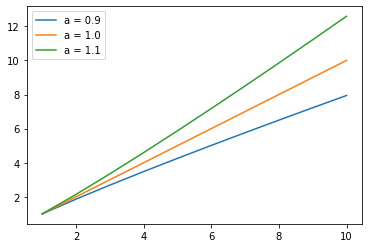

In [18]:
DF.plot()

In [19]:
path = %pwd
corrected_path = path.replace('\\','/')
print(corrected_path)

C:/Users/Natalie/Dropbox/Python_code/Covid-R-value


In [20]:
covid_data = pd.read_csv(corrected_path+'/data/daily_cuml_scot_20220204.csv')
covid_data.head()

,Date,DailyCases,CumulativeCases,Deaths
0,20200228,1,1,0
1,20200229,0,1,0
2,20200301,2,3,0
3,20200302,1,4,0
4,20200303,3,7,0


Text(0.5, 0, 'Days')

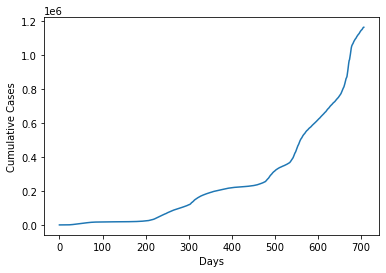

In [21]:
cases = covid_data['CumulativeCases'].values

covid_data['CumulativeCases'].plot()
plt.ylabel('Cumulative Cases')
plt.xlabel('Days')

Text(0.5, 0, 'Days')

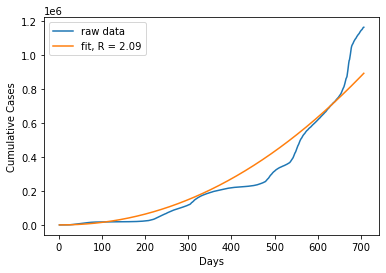

In [22]:
x_data = np.arange(1,len(cases)+1)

my_fit, params = curve_fit(y,x_data,cases)

est_fit = list(y(x_data,my_fit))
fit_DF = pd.DataFrame({'raw data':cases,'fit, R = %0.2f' %(my_fit):est_fit},index=x_data)

fit_DF.plot()
plt.ylabel('Cumulative Cases')
plt.xlabel('Days')

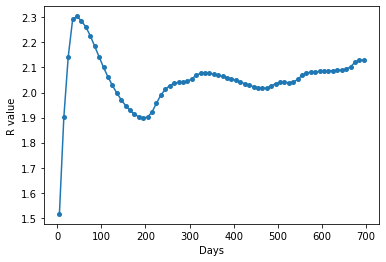

In [33]:
x, width = 0,10
R_values = []
x_fit = []

while x+width <= len(x_data)+1:
    x_fit.append(x+(width/2))
    R_i, p = curve_fit(y,x_data[x:x+width+1],cases[x:x+width+1])
    R_values.extend(R_i)
    x += width
    
plt.ylabel('R value')
plt.xlabel('Days')
plt.plot(x_fit,R_values, marker='.', mew=2)
plt.savefig('power_law_R_est.png')

### Probably not the correct model to use - this estimated R value is larger by more than a factor of 2, compared to what is published online.

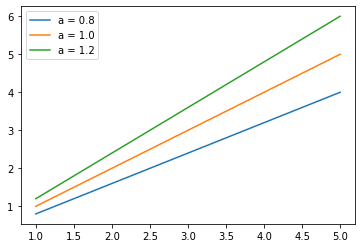

In [24]:
y2 = lambda x, a : x*a

x = np.arange(1,6)
S1 = Series((y2(x,0.8)), index=x)
S2 = Series((y2(x,1.0)), index=x)
S3 = Series((y2(x,1.2)), index=x)

DF_2 = DataFrame({'a = 0.8':S1,'a = 1.0':S2,'a = 1.2':S3}, index=x)
DF_2.plot()

Text(0, 0.5, 'ln(Cumulative Cases)')

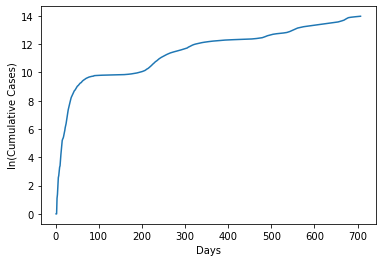

In [28]:
cases_log = np.log(cases)

plt.plot(x_data,cases_log)
plt.xlabel('Days')
plt.ylabel('ln(Cumulative Cases)')

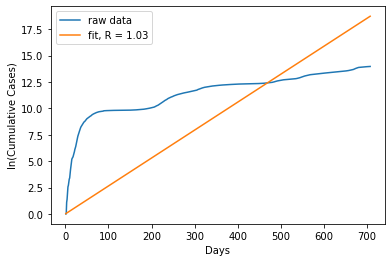

In [30]:
log_fit, params = curve_fit(y2,x_data,cases_log)

plt.plot(x_data, cases_log, label = 'raw data')
plt.plot(x_data, y2(x_data,log_fit), label = 'fit, R = %0.2f' %(np.exp(log_fit)))
plt.legend()
plt.xlabel('Days')
plt.ylabel('ln(Cumulative Cases)')
plt.show()

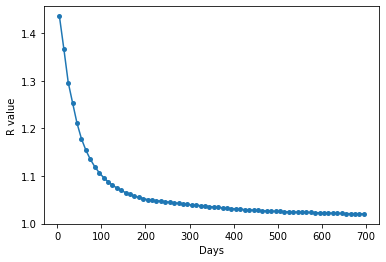

In [31]:
x, width = 0,10
R_values = []
x_fit = []

while x+width <= len(x_data)+1:
    x_fit.append(x+(width/2))
    R_i, p = curve_fit(y2,x_data[x:x+width+1],cases_log[x:x+width+1])
    R_values.extend(np.exp(R_i))
    x += width
    
plt.ylabel('R value')
plt.xlabel('Days')
plt.plot(x_fit,R_values, marker='.', mew=2)

### Obviously not a great fit, need to try something else...